# POSTTEST 6 KB
# DEEP NEURAL NETWORK

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('all_perth_house.csv')

## SPLIT DATA TRAIN DAN TEST

In [3]:
X = df[['LAND_AREA', 'FLOOR_AREA', 'BEDROOMS', 'BATHROOMS']]
Y = df['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## MEMBANGUN MODEL SEQUENTIAL

In [4]:
X.shape

(33656, 4)

In [5]:
model = Sequential([
    layers.Dense(64, activation= 'relu', input_shape=[4]),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(1, activation= 'linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='huber', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train, epochs = 40, validation_split = 0.2, verbose=1)

Epoch 1/40
589/589 [==============================] - 2s 3ms/step - loss: 603224.8750 - accuracy: 0.0000e+00 - val_loss: 565680.1875 - val_accuracy: 0.0000e+00
Epoch 2/40
589/589 [==============================] - 1s 2ms/step - loss: 529709.1875 - accuracy: 0.0000e+00 - val_loss: 413628.5938 - val_accuracy: 0.0000e+00
Epoch 3/40
589/589 [==============================] - 1s 2ms/step - loss: 249355.3281 - accuracy: 0.0000e+00 - val_loss: 200144.7188 - val_accuracy: 0.0000e+00
Epoch 4/40
589/589 [==============================] - 1s 2ms/step - loss: 201414.1562 - accuracy: 0.0000e+00 - val_loss: 199347.3281 - val_accuracy: 0.0000e+00
Epoch 5/40
589/589 [==============================] - 1s 2ms/step - loss: 201360.7812 - accuracy: 0.0000e+00 - val_loss: 199463.8281 - val_accuracy: 0.0000e+00
Epoch 6/40
589/589 [==============================] - 1s 2ms/step - loss: 201144.0469 - accuracy: 0.0000e+00 - val_loss: 199131.6562 - val_accuracy: 0.0000e+00
Epoch 7/40
589/589 [====================

In [8]:
model.evaluate(X_test, Y_test)

316/316 [==============================] - 1s 2ms/step - loss: 199019.1406 - accuracy: 0.0000e+00


[199019.140625, 0.0]

## UNDERFITTING

saya mencoba untuk normalisasi data target kemudian mencari nilai r2 nya

In [9]:
from sklearn.preprocessing import MinMaxScaler
Y = df[['PRICE']]
mm = MinMaxScaler()
mm.fit(Y)
Y_Scaled = mm.transform(Y)
Y_Scaled

array([[0.21515278],
       [0.13143575],
       [0.0987861 ],
       ...,
       [0.15738803],
       [0.10213478],
       [0.10213478]])

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_Scaled, test_size=0.3, random_state=42)

In [11]:
model = Sequential([
    layers.Dense(64, activation= 'relu', input_shape=[4]),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(1, activation= 'linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from sklearn.metrics import r2_score
rmse_metrics  = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
history = model.fit(X_train, Y_train, epochs = 40, validation_split = 0.2, verbose=1)

Epoch 1/40
589/589 [==============================] - 2s 3ms/step - loss: 236078.7500 - mae: 61.3944 - val_loss: 458.2726 - val_mae: 8.5871
Epoch 2/40
589/589 [==============================] - 1s 2ms/step - loss: 104063.9609 - mae: 36.5900 - val_loss: 2096.0229 - val_mae: 7.9699
Epoch 3/40
589/589 [==============================] - 1s 2ms/step - loss: 17774.3379 - mae: 11.6025 - val_loss: 4494.5278 - val_mae: 15.8410
Epoch 4/40
589/589 [==============================] - 1s 2ms/step - loss: 22562.5938 - mae: 15.8227 - val_loss: 1422.0106 - val_mae: 6.6073
Epoch 5/40
589/589 [==============================] - 1s 2ms/step - loss: 306714.1250 - mae: 30.3910 - val_loss: 38.2091 - val_mae: 2.6603
Epoch 6/40
589/589 [==============================] - 1s 2ms/step - loss: 351.3894 - mae: 3.6139 - val_loss: 44.7491 - val_mae: 2.0441
Epoch 7/40
589/589 [==============================] - 1s 2ms/step - loss: 86401.2344 - mae: 23.8185 - val_loss: 72.3800 - val_mae: 1.9238
Epoch 8/40
589/589 [======

In [14]:
model.evaluate(X_test, Y_test)

316/316 [==============================] - 1s 2ms/step - loss: 0.0683 - mae: 0.1439


[0.06830810755491257, 0.14386408030986786]

In [15]:
Y_pred = model.predict(X_test)
Y_pred

316/316 [==============================] - 1s 1ms/step


array([[0.19681439],
       [0.21002087],
       [0.48576126],
       ...,
       [0.47483978],
       [0.39933452],
       [0.4245163 ]], dtype=float32)

In [16]:
r2_score(Y_test, Y_pred)

-2.0438994225180953

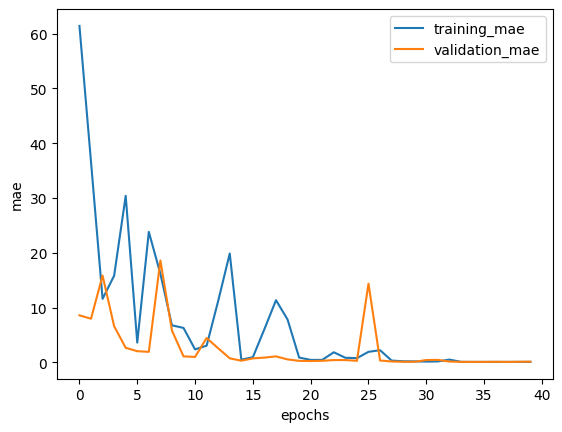

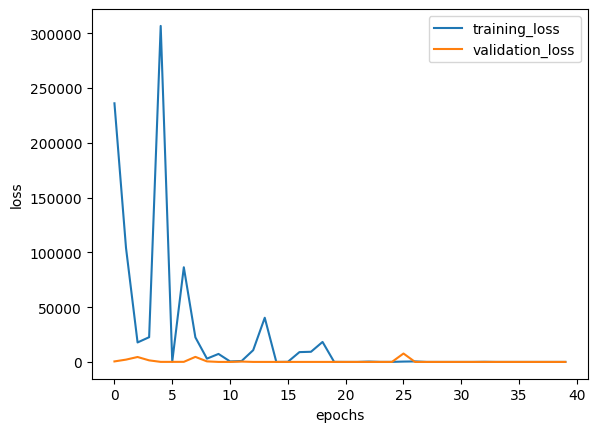

In [17]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend(['training_mae', 'validation_mae'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

## KINERJA MODEL TETAP BURUK, MESKIPUN SUDAH DI TAMBAH ITERASI EPOCH NYA, DAN COBA DI NORMALISASI TARGETNYA